在数据分析过程中，我们常常碰到需要快速绘图的场景。比如，在回归分析前看一下 y 和 x 的散点图。对于这类需求，pandas 提供了一个 [`pandas.DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 方法可以方便快捷地实现可视化。`pandas.DataFrame.plot` 方法是对 `matplotlib.axes.Axes.plot` 的封装，所以在调用该方法前，我们需要导入 matplotlib 包。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

首先我们生成一个 $10\times4$ 的 DataFrame，在接下来的绘图中，我们都使用该数据作为示例。  
> **Note:** 
> [`np.random.randn(x, y)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) 返回来自标准正态分布的样本，样本量为 $x \times y$。 [`pd.date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) 返回固定频率的时间索引。

In [2]:
ts = pd.DataFrame(np.random.randn(10, 4), index = pd.date_range('1/1/2022', periods = 10), columns=['A','B','C','D'])
ts = ts.cumsum()
ts.head()

,A,B,C,D
2022-01-01,1.384725,-0.558981,0.399943,1.835408
2022-01-02,0.399694,0.046732,0.677087,2.091474
2022-01-03,1.135797,-0.376897,-0.935937,1.580030
2022-01-04,1.679126,-0.415538,-0.802903,2.089696
2022-01-05,0.668179,-0.512195,-1.550540,2.044332


下面，我们调用 `plot` 方法查看一下刚刚生成的数据。对 DataFrame 中的每一列数值型数据，pandas 默认使用折线图进行绘制。

<AxesSubplot:>

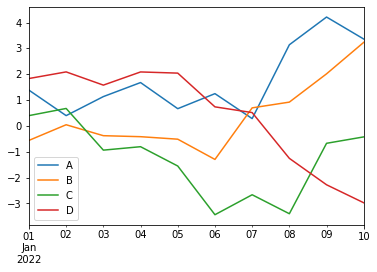

In [3]:
ts.plot()

pandas 也支持对 Series 类型调用 `plot` 方法，因此我们也可以对任意一列进行绘图。比如，我们看一下 A 列数据：

<AxesSubplot:>

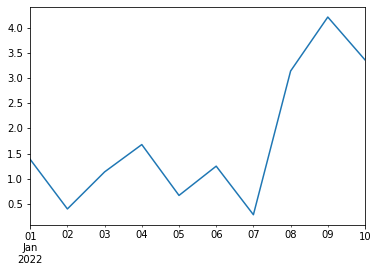

In [4]:
ts['A'].plot()

除了折线图，`plot` 方法还支持其他类图的绘制，可以通过 `kind` 参数实现。比如，我们可以看一下 A 列数据与 B 列数据的散点图。

<AxesSubplot:xlabel='A', ylabel='B'>

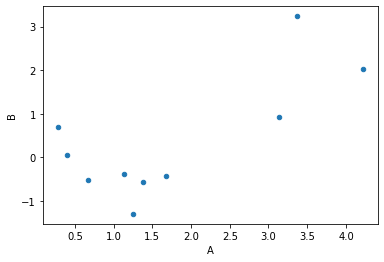

In [5]:
ts.plot(x='A', y='B', kind='scatter')

此外，pandas 也提供另外一种方式来简化调用，即使用 `DataFrame.plot.scatter()` 的方式来调用：

<AxesSubplot:xlabel='A', ylabel='B'>

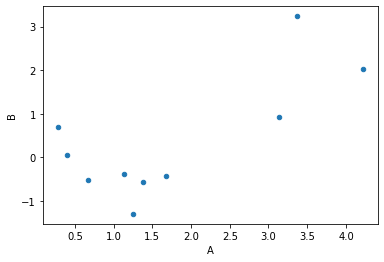

In [6]:
ts.plot.scatter(x='A', y='B')

`plot` 方法支持如下图类的绘制：
- line : 折线图（line plot，默认）
- bar : 柱状图（vertical bar plot）
- barh : 横向柱状图（horizontal bar plot）
- hist : 直方图（histogram）
- box : 箱型图（box plot）
- kde : 核密度估计图（Kernel Density Estimation plot）
- density : same as ‘kde’
- area : 面积图（area plot）
- pie : 饼图（pie plot）
- scatter : 散点图（scatter plot，DataFrame only）
- hexbin : 六边形图（hexbin plot，DataFrame only）

有时候，我们希望把每一列数据绘制在一张子图上。在调用 `plot` 方法时，将 `subplots` 参数设置为 true 即可实现。

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

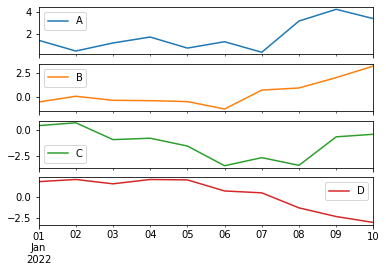

In [7]:
ts.plot(subplots=True)

进一步，我们可以使用 `layout` 参数为子图排版：

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

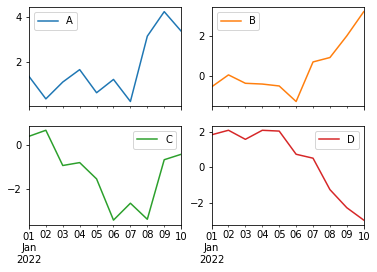

In [8]:
ts.plot(subplots=True, layout=(2,2))

# 定制图
`plot` 方法中有一个 `ax` 参数可以接收一个 matplotlib 坐标轴对象（matplotlib axes object），这样我们便可以在 matplotlib axes 对象上利用 `plot` 方法画图。这意味着，我们可以使用 matplotlib 提供的方法对图像进行定制。

In [9]:
ts.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

Text(0, 0.5, 'NO$_2$ concentration')

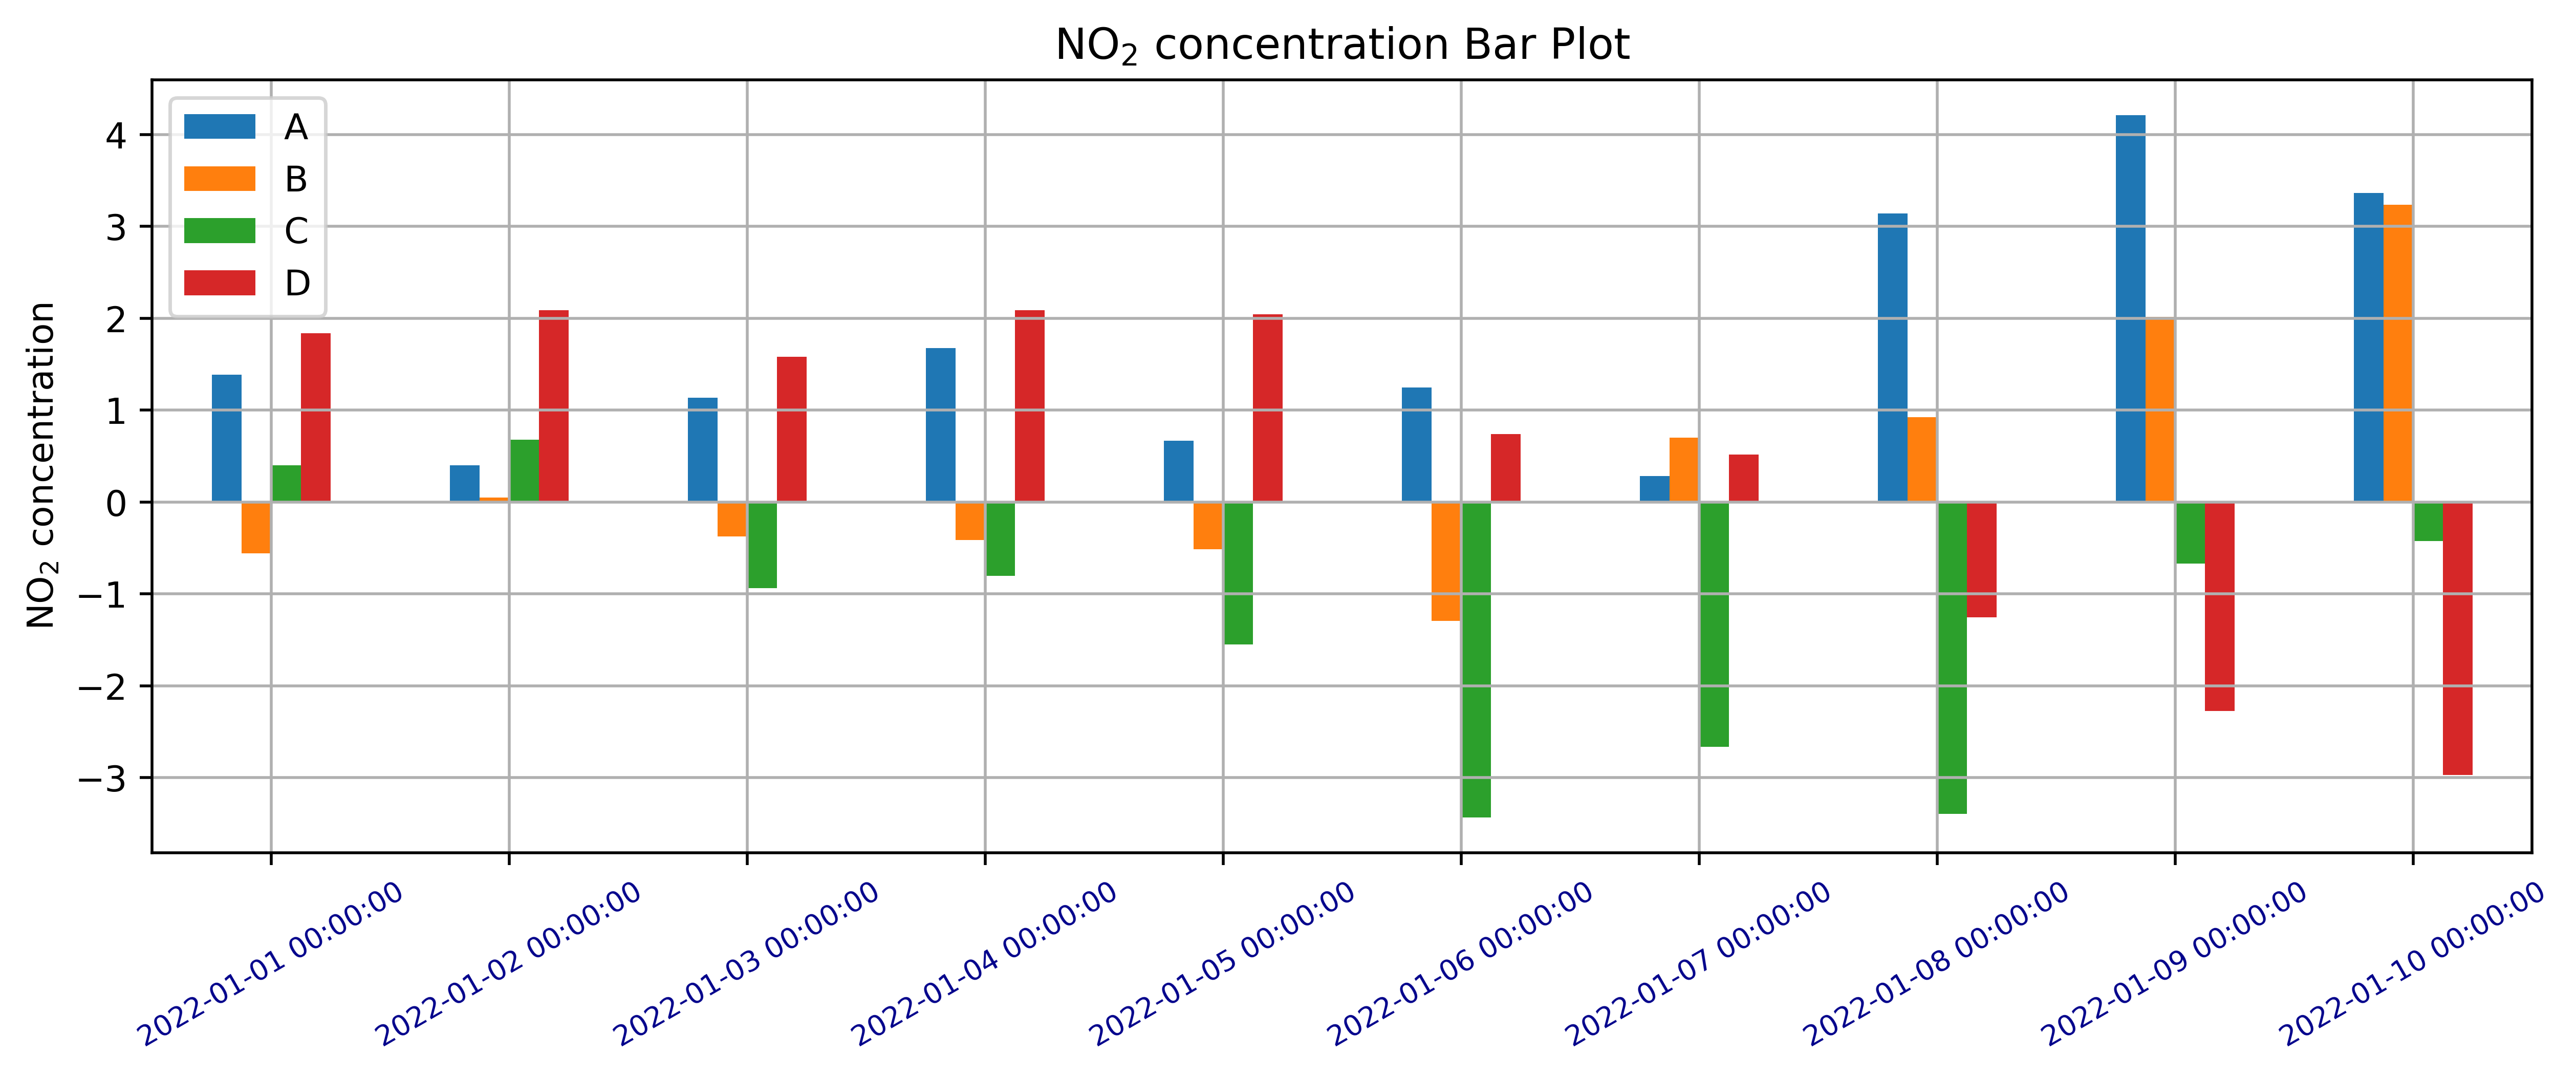

In [12]:
fig, axs = plt.subplots(figsize=(12,4), dpi=500)
ts.plot.bar(ax=axs, align='center', grid=True, title='NO$_2$ concentration Bar Plot')
for label in axs.xaxis.get_ticklabels():
    label.set_color('darkblue')
    label.set_rotation(30)
    label.set_fontsize(8)
    
axs.set_ylabel("NO$_2$ concentration")

[Text(0, 0, '2022-01-01'),
 Text(1, 0, '2022-01-02'),
 Text(2, 0, '2022-01-03'),
 Text(3, 0, '2022-01-04'),
 Text(4, 0, '2022-01-05'),
 Text(5, 0, '2022-01-06'),
 Text(6, 0, '2022-01-07'),
 Text(7, 0, '2022-01-08'),
 Text(8, 0, '2022-01-09'),
 Text(9, 0, '2022-01-10')]

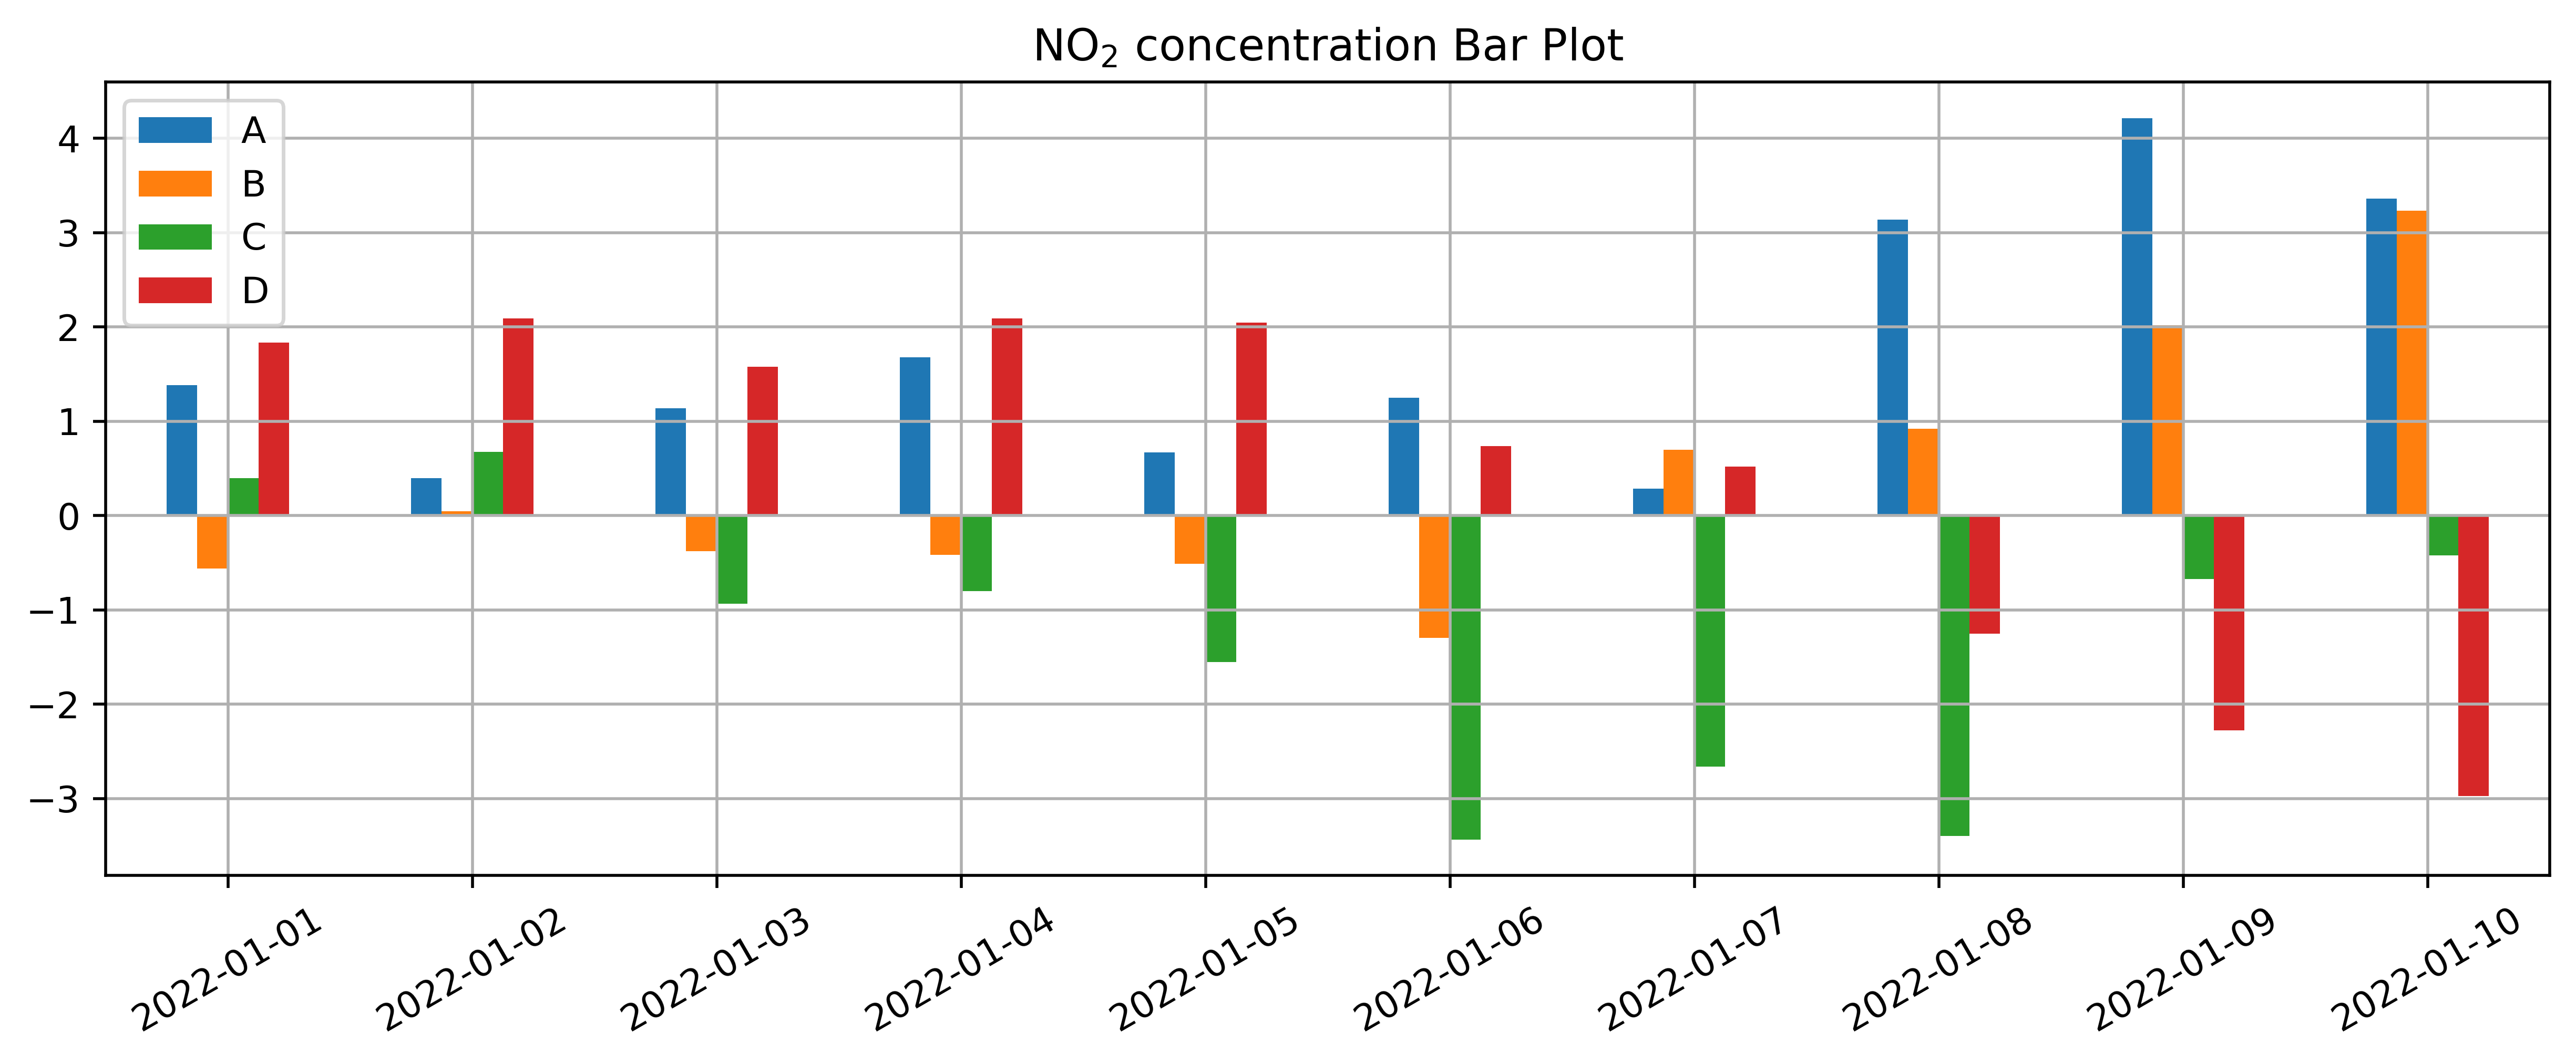

In [11]:
fig, axs = plt.subplots(figsize=(12,4), dpi=500)
ts.plot.bar(ax=axs, align='center', grid=True, title='NO$_2$ concentration Bar Plot')
axs.set_xticks(range(len(ts.index)))
axs.set_xticklabels([i.strftime('%Y-%m-%d') for i in ts.index], rotation=30)

In [31]:
fig.savefig('no2_concentration.png')